# Worksheet 06

Name: Daniyal Ahmed
UID: U11469883

### Topics

- Kmeans ++
- Hierarchical Clustering

### Kmeans ++

a) What is the difference between K means and K means ++?

The only true difference between K means and K means++ lies in the intialization of the inital centriods. Where Kmeans chooses the centriods at random what K means++ does is that it picks the first one at random than picks the rest with probability proportional to how far the first they are from the first one. Thus the farther the point is the more likely it is to be picked

b) What are some limitations of K means ++?

K means++ is not a huge fan of different sizes and densities in clustering. If it is given datapoints that have clusterings have different densities and or sizes the following could happen:
+ 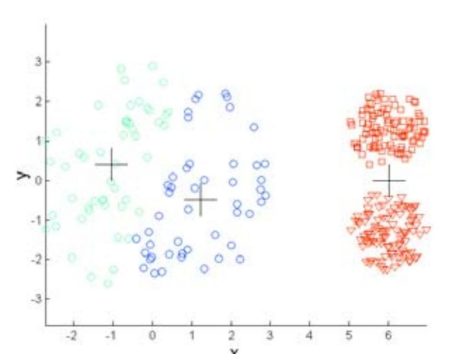

If you notice closely there are two obviously two different clusterings on the right but k means++ marks both as one clustering, furthermore if you notice on left hand side, there are two different clusterings. However you can consider them just one cluster, inturn this is what the clustering should look like:
+ 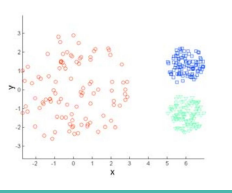

c) Interpret the silhouette plot below. It's a histogram where each bar corresponds to the silhouette score for that data point. Comment on which number of clusters K (2,3,4 or 5) you would choose and why. (the red dotted line is the average silhouette score over the entire dataset).

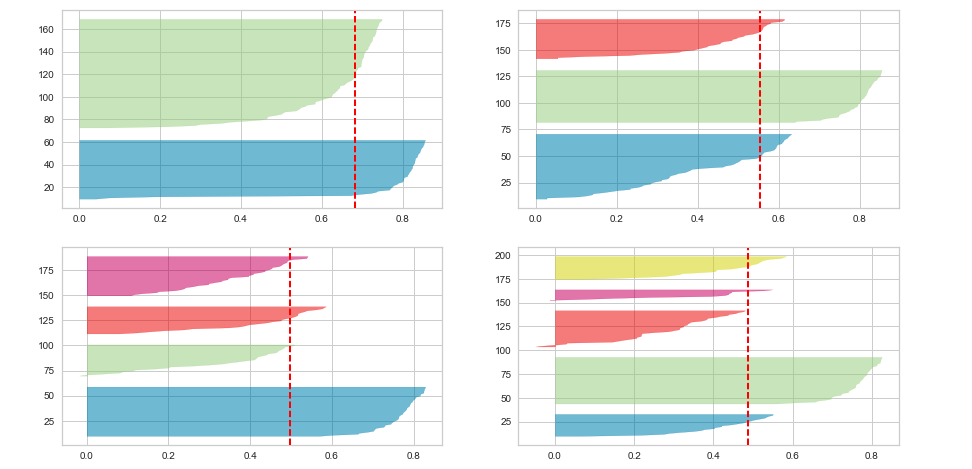

In [53]:
from IPython.display import Image
Image(filename="silhouette.png", width=500, height=500)

I believe I would choose 2 clusters for this data point. This is because the silhoutte score for just have two clustering is much higher, this tells me that the clusters are farther apart and much more tightly packed together than all the other clusterings.

### Hierarchical Clustering

Using the following dataset:

| Point | x | y |
|-------|---|---|
| A     | 0 | 0 |
| B     | 1 | 1 |
| C     | 3 | 0 |
| D     | 0 | 1 |
| E     | 2 | 2 |

with

d = Euclidean  
D = Single-Link

produce the distance matrix at every step of the hierarchical clustering algorithm.

Step 1

|   | A | B | C | D | E |
|---|---|---|---|---|---|
| A | 0 | $\sqrt2$  | 3  |  1 | $2 \sqrt2$   |
| B |   $\sqrt2$ | 0 |  $\sqrt5$ |  1 | $\sqrt2$  |
| C | 3  | $\sqrt5$  | 0 | $\sqrt10$  |  $\sqrt5$  |
| D | 1  | 1  | $\sqrt10$   | 0 | $\sqrt5$   |
| E | $2 \sqrt2$   | $\sqrt2$  |  $\sqrt5$   |  $\sqrt5$  | 0 |

Step 2

|   | A&D  | B  | C  |  E |
|---|---|---|---|---|
| A&D  | 0 |  1 | 3  |  $\sqrt5$ |
|  B |  1 | 0 |  $\sqrt5$  | $\sqrt2$  |
|  C |  3 | $\sqrt5$  | 0 | $\sqrt5$  |
|  E | $\sqrt5$  |  $\sqrt2$ | $\sqrt5$  | 0 |

Step 3

|  |  A&D&B | C  | E  |
|---|---|---|---|
|  A&D&B  | 0 |  $\sqrt5$ | $\sqrt2$  |
|  C  | $\sqrt5$  | 0 | $\sqrt5$   |
|   E |   $\sqrt2$  |  $\sqrt5$ | 0 |

Step 4

|   | A&D&B&E  | C  |
|---|---|---|
|  A&D&B  | 0 | $\sqrt5$  |
|  C  | $\sqrt5$  | 0 |

Repeat the above with

d = Euclidean  
D = Complete-Link

Step 1

|   | A | B | C | D | E |
|---|---|---|---|---|---|
| A | 0 | $\sqrt2$  | 3  |  1 | $2 \sqrt2$   |
| B |   $\sqrt2$ | 0 |  $\sqrt5$ |  1 | $\sqrt2$  |
| C | 3  | $\sqrt5$  | 0 | $\sqrt10$  |  $\sqrt5$  |
| D | 1  | 1  | $\sqrt10$   | 0 | $\sqrt5$   |
| E | $2 \sqrt2$   | $\sqrt2$  |  $\sqrt5$   |  $\sqrt5$  | 0 |

Step 2

|   | A&D  | B  | C  |  E |
|---|---|---|---|---|
| A&D  | 0 |  $\sqrt2$ | $\sqrt10$  |  $2\sqrt2$ |
|  B |  $\sqrt2$  | 0 |  $\sqrt5$  | $\sqrt2$  |
|  C |   $\sqrt10$ | $\sqrt5$  | 0 | $\sqrt5$  |
|  E | $2\sqrt2$  |  $\sqrt2$ | $\sqrt5$  | 0 |

Step 3

|   |  A&D&B  |  C | E  |
|---|---|---|---|
|  A&D&B | 0 | $\sqrt10$  | $2\sqrt2$  |
|  C |  $\sqrt10$ | 0 | $\sqrt5$  |
|  E |  $2\sqrt2$ |  $\sqrt5$  | 0 |

Step 4

|   |  A&D&B | C&E  |
|---|---|---|
|  A&D&B  | 0 | $\sqrt10$    |
|  C&E | $\sqrt10$  | 0 |

## Challenge Problem

### Input:
- Some DNA sequences, each sequence is on a new line. All sequences are of equal length and consist of characters from the set {A, C, G, T}.


### Task:
- Implement a hierarchical clustering algorithm using Hamming distance as the metric clustering DNA sequences.

### Definition of Hamming Distance:

The Hamming distance between two strings of equal length is the number of positions at which the corresponding symbols are different. Mathematically, if we have two strings, $s$ and $t$, of equal length, then the Hamming distance $H(s, t)$ is given by:

$$ H(s, t) = \sum_{i=1}^{n} [s_i \neq t_i] $$

where $n$ is the length of the strings, $s_i$ and $t_i$ are the characters at position $i$ in $s$ and $t$ respectively, and $[s_i \neq t_i]$ is an indicator function, equal to 1 if $s_i \neq t_i$ and 0 otherwise.


### Guidelines:
1. **Read the Dataset**: Choose appropriate data structure.
2. **Compute Hamming Distance**: Implement a function to calculate the Hamming distance between any two sequences.
3. **Hierarchical Clustering**: Apply the hierarchical clustering algorithm using the single-linkage method.
4. **Dendrogram**: Generate a dendrogram to visualize the clustering.
5. **NOTE**: You may use any Python library, but be sure to understand the underlying algorithm.

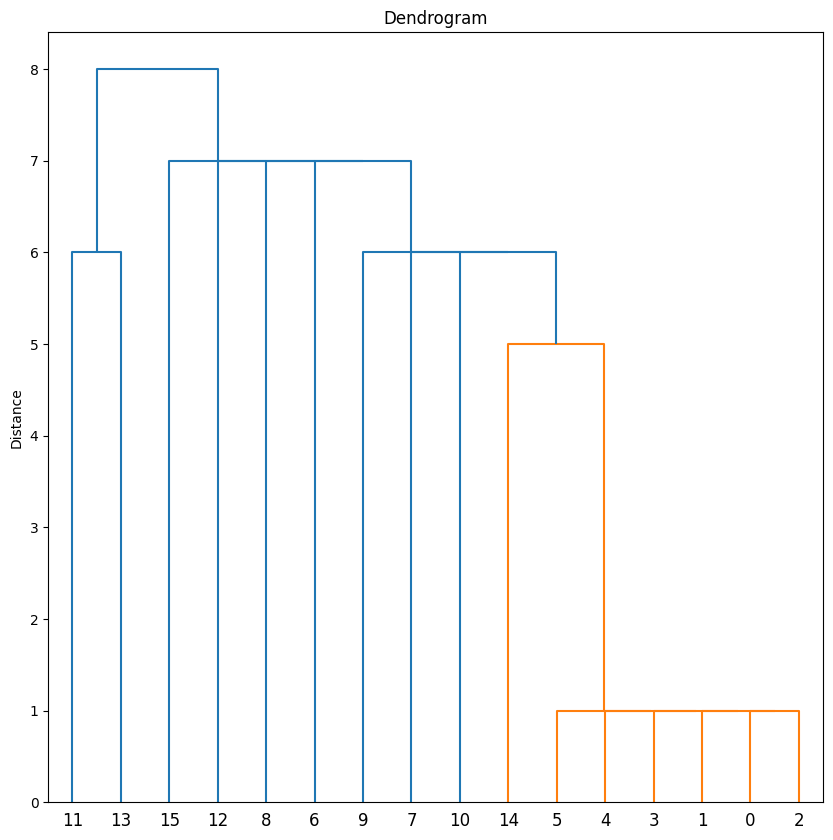

In [56]:
import numpy as np
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import squareform
import matplotlib.pyplot as plt



sequences = [
 'ACGTGGTCTTAA',
 'ACGTCGTCTTAC',
 'ACGTGGTCTTAC',
 'ACGTAGTCTTAA',
 'ACGTGGTCTTCC',
 'ACGTGGTCTTAG',
 'CTGTTAAATAAG',
 'GGTTAGAACACG',
 'AGTGGTTGAAGT',
 'GGCTTACACCCT',
 'AGATTGTCCACT',
 'CATGCGGTCAAC',
 'ATATATCATAGC',
 'TTTGCGGTTGGA',
 'GAATGGTCAGAA',
 'GTGATGCTGTCT']

'''This function takes in two sequences and returns the hamming distance between them,'''
def hamming_dis(sequence1,sequence2):
    if(len(sequence1)!=len(sequence2)):
        raise ValueError("strings should be of same length")


    count =0
    for i in range(len(sequence1)):
        if(sequence1[i] != sequence2[i]):
            count+=1.0


    return count



#The question asks use the appropriate Data structure, Thus I went with a Matrix 
def Matrix(sequences):

    Mat = [[0 for x in sequences] for y in sequences]


    #Adding all sequences to table

    for i in range((len(sequences))):
        for j in range((len(sequences))):
            S= sequences[i]
            T = sequences[j]
            '''Here I compute the hamming distance between each pair of sequences and add it to the matrix
            It doesn't matter if i and j are equal since that will return a distance of 0 which makes complete sense'''
            Mat[i][j] = hamming_dis(S,T)


    '''This is a function from the scipy libary that helps us perform hierchical clustering
    , from what the documentation says it uses Agglomerative Clustering, what it takes in is 
    a distance matrix, and it takes another optional parameter called method, which is the method used to compute the distance between the clusters
    finally it then returns a linkage matrix, which is a matrix that contains the information about the clustering process
    Furthermore on the linkage documentation, it says we must use a condensed distance matrix, rather than the 2d array we made
    Documentation: https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.linkage.html'''
    
    condensed_mat = squareform(Mat)



    link =  linkage(condensed_mat , 'single')


    return link



link = Matrix(sequences)
plt.figure(figsize=(10, 10))


"""Simply put it, this dendogram function allows us to plot our linkage matrix into a dendogram, 
The only parameter we really need to give it is the linkage matrix, and it returns a dendogram"""

dendrogram(link)
plt.title("Dendrogram")
plt.ylabel("Distance")
plt.show()




